In [ ]:
from google.colab import files
files.upload()

Saving Coronavirus_Tweets.csv to Coronavirus_Tweets.csv


In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/Coronavirus_Tweets.csv', encoding = 'latin-1')

In [ ]:
dataset.tail(5)

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
564136,1244414024395218947,1028783469399367682,2020-03-29T23:59:58Z,tmcrypto1,A 3rd #NYPD member dies of #coronavirus after ...,Twitter for iPhone,NaN,NaN,NaN,False,False,2526,0,NaN,NaN,NaN,85,123,NaN,2018-08-12T23:21:07Z,False,en
564137,1244414030011400192,81191957,2020-03-29T23:59:59Z,CALcharters,"For many students in our state, #COVID19 closu...",HubSpot,NaN,NaN,NaN,False,False,4656,2,NaN,NaN,NaN,8104,2798,NaN,2009-10-09T20:10:36Z,True,en
564138,1244414029864603657,61206610,2020-03-29T23:59:59Z,npquarterly,Will the #coronavirus pandemic of 2020 come to...,HubSpot,NaN,NaN,NaN,False,False,2916,2,NaN,NaN,NaN,127869,3046,NaN,2009-07-29T14:27:16Z,False,en
564139,1244414029189148672,259814704,2020-03-29T23:59:59Z,ksharizal,Tahniah #xaffani #xaffanisrikandi semoga our f...,Twitter for Android,NaN,NaN,NaN,False,False,1169,0,NaN,NaN,NaN,413,175,NaN,2011-03-02T17:12:10Z,False,in
564140,1244414030418067456,938881148792348672,2020-03-29T23:59:59Z,MeL8tleigh,ð¤¦ð»ââï¸ Is there a way to revoke som...,Twitter for iPhone,NaN,NaN,NaN,True,False,35055,0,NaN,NaN,NaN,302,384,NaN,2017-12-07T21:21:24Z,False,en


**Importing libraries**

In [ ]:
import io
import os
import random
import string
import re
import warnings
warnings.filterwarnings('ignore')
import numpy as np    # linear algebra
import pandas as pd   # data preprocessing
import matplotlib.pyplot as plt  # data visualization library
%matplotlib inline
import seaborn as sns  # an interactive data visualization library made on top of matplotlib

# importing nltk and its modules
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

# importing sklearn and its modules
from sklearn import feature_extraction, preprocessing, model_selection, linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tqdm import tqdm_notebook

# saving models
import pickle

# importing textblob
from textblob import TextBlob
from textblob import Word

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Data analysis

In [ ]:
dataset.describe()

,status_id,user_id,reply_to_status_id,reply_to_user_id,favourites_count,retweet_count,followers_count,friends_count,account_lang
count,5.641410e+05,5.641410e+05,7.596700e+04,9.083400e+04,5.641410e+05,564141.000000,5.641410e+05,5.641410e+05,0.0
mean,1.244256e+18,3.509791e+17,1.243489e+18,2.328710e+17,1.303235e+04,4.523367,4.694870e+04,2.028971e+03,NaN
std,1.009210e+14,5.005893e+17,1.656581e+16,4.318633e+17,4.064032e+04,97.541022,4.581481e+05,1.023677e+04,NaN
min,1.244052e+18,1.890000e+02,6.944339e+16,1.200000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
25%,1.244174e+18,1.835883e+08,1.244064e+18,5.254428e+07,2.380000e+02,0.000000,1.190000e+02,1.420000e+02,NaN
50%,1.244275e+18,1.371141e+09,1.244215e+18,3.717971e+08,1.891000e+03,0.000000,6.570000e+02,4.840000e+02,NaN
75%,1.244339e+18,9.088677e+17,1.244309e+18,3.439293e+09,9.387000e+03,1.000000,3.501000e+03,1.430000e+03,NaN
max,1.244414e+18,1.244411e+18,1.244414e+18,1.244402e+18,1.536144e+06,26508.000000,4.931557e+07,1.180649e+06,NaN


In [ ]:
dataset.info

<bound method DataFrame.info of                   status_id              user_id  ... verified lang
0       1244051646071611394   860252856829587457  ...    False   es
1       1244051645039706112  1125933654943895553  ...    False   es
2       1244051645975191557             80943559  ...    False   en
3       1244051646750928897   817072420947247104  ...    False   es
4       1244051647032102914   788863557349670913  ...    False   es
...                     ...                  ...  ...      ...  ...
564136  1244414024395218947  1028783469399367682  ...    False   en
564137  1244414030011400192             81191957  ...     True   en
564138  1244414029864603657             61206610  ...    False   en
564139  1244414029189148672            259814704  ...    False   in
564140  1244414030418067456   938881148792348672  ...    False   en

[564141 rows x 22 columns]>

Checking for missing values

In [ ]:
dataset.isnull()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,False,False,False,False,False,False,True,True,True,False,False,False,False,True,True,True,False,False,True,False,False,False
1,False,False,False,False,False,False,True,True,True,False,False,False,False,True,True,True,False,False,True,False,False,False
2,False,False,False,False,False,False,True,True,True,False,False,False,False,True,True,True,False,False,True,False,False,False
3,False,False,False,False,False,False,True,True,True,False,False,False,False,True,True,True,False,False,True,False,False,False
4,False,False,False,False,False,False,True,True,True,False,False,False,False,True,True,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564136,False,False,False,False,False,False,True,True,True,False,False,False,False,True,True,True,False,False,True,False,False,False
564137,False,False,False,False,False,False,True,True,True,False,False,False,False,True,True,True,False,False,True,False,False,False
564138,False,False,False,False,False,False,True,True,True,False,False,False,False,True,True,True,False,False,True,False,False,False
564139,False,False,False,False,False,False,True,True,True,False,False,False,False,True,True,True,False,False,True,False,False,False


In [ ]:
dataset.isnull().values.any()

True

In [ ]:
dataset.isnull().sum()

status_id                    0
user_id                      0
created_at                   0
screen_name                  0
text                         0
source                       1
reply_to_status_id      488174
reply_to_user_id        473307
reply_to_screen_name    473307
is_quote                     0
is_retweet                   0
favourites_count             0
retweet_count                0
country_code            533629
place_full_name         533446
place_type              533446
followers_count              0
friends_count                0
account_lang            564141
account_created_at           0
verified                     0
lang                         0
dtype: int64

Handling missing values

In [ ]:
cols_with_missing_values = [col for col in dataset.columns if dataset[col].isnull().sum()>1]
print(cols_with_missing_values)

['reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name', 'country_code', 'place_full_name', 'place_type', 'account_lang']


In [ ]:
updated_dataset = dataset.drop(cols_with_missing_values, axis=1)
print(updated_dataset)

                  status_id              user_id  ... verified lang
0       1244051646071611394   860252856829587457  ...    False   es
1       1244051645039706112  1125933654943895553  ...    False   es
2       1244051645975191557             80943559  ...    False   en
3       1244051646750928897   817072420947247104  ...    False   es
4       1244051647032102914   788863557349670913  ...    False   es
...                     ...                  ...  ...      ...  ...
564136  1244414024395218947  1028783469399367682  ...    False   en
564137  1244414030011400192             81191957  ...     True   en
564138  1244414029864603657             61206610  ...    False   en
564139  1244414029189148672            259814704  ...    False   in
564140  1244414030418067456   938881148792348672  ...    False   en

[564141 rows x 15 columns]


In [ ]:
updated_dataset.columns

Index(['status_id', 'user_id', 'created_at', 'screen_name', 'text', 'source',
       'is_quote', 'is_retweet', 'favourites_count', 'retweet_count',
       'followers_count', 'friends_count', 'account_created_at', 'verified',
       'lang'],
      dtype='object')

In [ ]:
updated_dataset.head()

,status_id,user_id,created_at,screen_name,text,source,is_quote,is_retweet,favourites_count,retweet_count,followers_count,friends_count,account_created_at,verified,lang
0,1244051646071611394,860252856829587457,2020-03-29T00:00:00Z,IMSS_SanLuis,"Ante cualquier enfermedad respiratoria, no te ...",TweetDeck,False,False,300,0,1008,41,2017-05-04T22:00:38Z,False,es
1,1244051645039706112,1125933654943895553,2020-03-29T00:00:00Z,intrac_ccs,#ATENCIÃN En el Terminal Nuevo Circo se imple...,TweetDeck,False,False,1030,1,90,316,2019-05-08T01:21:16Z,False,es
2,1244051645975191557,80943559,2020-03-29T00:00:00Z,rlieving,âPeople are just storing up. They are stayin...,TweetDeck,False,False,604,0,136,457,2009-10-08T21:06:08Z,False,en
3,1244051646750928897,817072420947247104,2020-03-29T00:00:00Z,Tu_IMSS_Coah,"Si empezaste a trabajar, necesitas dar de alta...",TweetDeck,False,False,1827,0,1549,170,2017-01-05T18:17:00Z,False,es
4,1244051647032102914,788863557349670913,2020-03-29T00:00:00Z,Tabasco_IMSS,Una sociedad informada estÃ¡ mejor preparada a...,TweetDeck,False,False,723,0,868,125,2016-10-19T22:05:03Z,False,es


Temporal frequency of tweets per hour

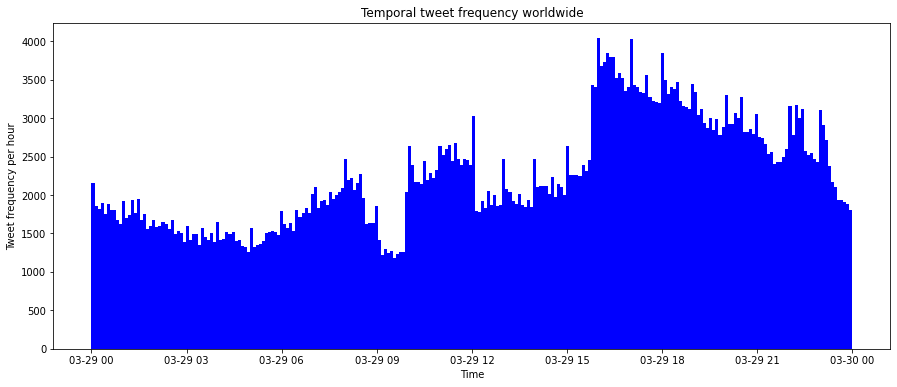

In [ ]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
ax.set(title='Temporal tweet frequency worldwide', xlabel='Time', ylabel='Tweet frequency per hour')
plt.hist(pd.to_datetime(updated_dataset.created_at), bins = 25*10, color = 'b')
plt.show()

In [ ]:
print(len(updated_dataset[updated_dataset.lang == 'en']))

313036


Drop the columns other than lang = 'en'

In [ ]:
new_dataset = updated_dataset[updated_dataset['lang']=='en']
new_dataset.head()
# updated_dataset.drop(updated_dataset[updated_dataset['lang'] != 'en'].index, inplace = True)

,status_id,user_id,created_at,screen_name,text,source,is_quote,is_retweet,favourites_count,retweet_count,followers_count,friends_count,account_created_at,verified,lang
2,1244051645975191557,80943559,2020-03-29T00:00:00Z,rlieving,âPeople are just storing up. They are stayin...,TweetDeck,False,False,604,0,136,457,2009-10-08T21:06:08Z,False,en
6,1244051646935633921,27922157,2020-03-29T00:00:00Z,AmerMedicalAssn,.@PatriceHarrisMD spoke with @YahooFinance abo...,Sprinklr,False,False,2894,3,714952,6877,2009-03-31T17:50:31Z,True,en
7,1244051645971025920,1115874631,2020-03-29T00:00:00Z,CGTNOfficial,First medical team aiding #Wuhan in fight agai...,Twitter Media Studio,False,False,65,18,14040072,55,2013-01-24T03:18:59Z,True,en
9,1244051647149543426,108845320,2020-03-29T00:00:00Z,OnTopMag,.@KathyGriffin: @realDonaldTrump Is 'Lying' Ab...,Twitter for Advertisers,False,False,2658,1,5042,5389,2010-01-27T05:23:15Z,False,en
14,1244051645102579712,17673635,2020-03-29T00:00:00Z,livemint,#CoronaUpdate | Johns Hopkins University has s...,TweetDeck,False,False,474,2,1862858,127,2008-11-27T09:07:38Z,True,en


In [ ]:
# Reset index
new_dataset1 = new_dataset.reset_index(inplace = True)
new_dataset.tail()

,index,status_id,user_id,created_at,screen_name,text,source,is_quote,is_retweet,favourites_count,retweet_count,followers_count,friends_count,account_created_at,verified,lang
313031,564135,1244414024634302464,1085912953466048512,2020-03-29T23:59:58Z,RisatoNicola,"#Trump extends #coronavirus guidelines, braces...",Twitter for Android,False,False,3575,1,160,97,2019-01-17T14:53:18Z,False,en
313032,564136,1244414024395218947,1028783469399367682,2020-03-29T23:59:58Z,tmcrypto1,A 3rd #NYPD member dies of #coronavirus after ...,Twitter for iPhone,False,False,2526,0,85,123,2018-08-12T23:21:07Z,False,en
313033,564137,1244414030011400192,81191957,2020-03-29T23:59:59Z,CALcharters,"For many students in our state, #COVID19 closu...",HubSpot,False,False,4656,2,8104,2798,2009-10-09T20:10:36Z,True,en
313034,564138,1244414029864603657,61206610,2020-03-29T23:59:59Z,npquarterly,Will the #coronavirus pandemic of 2020 come to...,HubSpot,False,False,2916,2,127869,3046,2009-07-29T14:27:16Z,False,en
313035,564140,1244414030418067456,938881148792348672,2020-03-29T23:59:59Z,MeL8tleigh,ð¤¦ð»ââï¸ Is there a way to revoke som...,Twitter for iPhone,True,False,35055,0,302,384,2017-12-07T21:21:24Z,False,en


In [ ]:
new_dataset.drop(['index', 'source', 'screen_name', 'lang', 'friends_count',	'account_created_at',	'verified', 'is_quote',	'is_retweet',	'favourites_count',	'retweet_count', 'followers_count'], axis=1, inplace=True)
new_dataset.tail(3)

,status_id,user_id,created_at,text
313033,1244414030011400192,81191957,2020-03-29T23:59:59Z,"For many students in our state, #COVID19 closu..."
313034,1244414029864603657,61206610,2020-03-29T23:59:59Z,Will the #coronavirus pandemic of 2020 come to...
313035,1244414030418067456,938881148792348672,2020-03-29T23:59:59Z,ð¤¦ð»ââï¸ Is there a way to revoke som...


In [ ]:
new_dataset.shape

(313036, 4)

In [ ]:
# No. of unique users
new_dataset.user_id.unique().shape[0]

190147

Selecting the tweets column

In [ ]:
tweets = new_dataset['text']
tweets.head()

0    âPeople are just storing up. They are stayin...
1    .@PatriceHarrisMD spoke with @YahooFinance abo...
2    First medical team aiding #Wuhan in fight agai...
3    .@KathyGriffin: @realDonaldTrump Is 'Lying' Ab...
4    #CoronaUpdate | Johns Hopkins University has s...
Name: text, dtype: object

Data preprocessing

In [ ]:
# Removing urls, mentions and hashtags
tweets = tweets.apply(lambda x: re.sub(r"@\S+", "", str(x)))
tweets = tweets.apply(lambda x: re.sub(r'#\S+', '', str(x)))
tweets_no_url = tweets.apply(lambda x: re.sub(r"https\S+", "", str(x)))
tweets_no_url.head()

0    âPeople are just storing up. They are stayin...
1    . spoke with  about the  stimulus package maki...
2    First medical team aiding  in fight against ep...
3                      .  Is 'Lying' About  Testing   
4     | Johns Hopkins University has said it did no...
Name: text, dtype: object

In [ ]:
# Removing punctuation and converting one tweet to lowercase
texts = "".join([word.lower() for word in tweets_no_url[0] if word not in string.punctuation])
texts

'â\x80\x9cpeople are just storing up they are staying at home freezing things i talk to dealers around the state and out of the area they are all out of freezersâ\x80\x9d said owner frank mertz\n\n\n\n    '

In [ ]:
# lower and remove the punctuation from text
texts = tweets_no_url.apply(lambda x: x.lower())
texts = texts.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
texts

0         âpeople are just storing up they are staying...
1          spoke with  about the  stimulus package makin...
2         first medical team aiding  in fight against ep...
3                                is lying about  testing   
4           johns hopkins university has said it did not...
                                ...                        
313031     extends  guidelines braces  for big death tol...
313032    a 3rd  member dies of  after hundreds of offic...
313033    for many students in our state  closures are i...
313034    will the  pandemic of 2020 come to be seen as ...
313035    ð¤¦ð»ââï¸ is there a way to revoke som...
Name: text, Length: 313036, dtype: object

In [ ]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
texts = texts.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
texts

0         âpeople storing staying home freezing things...
1         spoke stimulus package making way congress hea...
2         first medical team aiding fight epidemic compl...
3                                             lying testing
4         johns hopkins university said authorize use lo...
                                ...                        
313031             extends guidelines braces big death toll
313032      3rd member dies hundreds officers test positive
313033    many students state closures impacting ability...
313034    pandemic 2020 come seen momentary interruption...
313035    ð¤¦ð»ââï¸ way revoke someoneâs twitt...
Name: text, Length: 313036, dtype: object

In [ ]:
# Remove all special characters and emojis
texts = texts.apply(lambda x: re.sub('[^a-zA-Z0-9#]', ' ', str(x)))
texts.head(3)

0       people storing staying home freezing things...
1    spoke stimulus package making way congress hea...
2    first medical team aiding fight epidemic compl...
Name: text, dtype: object

In [ ]:
# removing spaces from first and last of the tweets
texts = texts.apply(lambda x: x.strip())
texts

0         people storing staying home freezing things ta...
1         spoke stimulus package making way congress hea...
2         first medical team aiding fight epidemic compl...
3                                             lying testing
4         johns hopkins university said authorize use lo...
                                ...                        
313031             extends guidelines braces big death toll
313032      3rd member dies hundreds officers test positive
313033    many students state closures impacting ability...
313034    pandemic 2020 come seen momentary interruption...
313035    way revoke someone   s twitter account petitio...
Name: text, Length: 313036, dtype: object

In [ ]:
tweets_dt = texts.to_frame()
tweets_dt.head()

,text
0,people storing staying home freezing things ta...
1,spoke stimulus package making way congress hea...
2,first medical team aiding fight epidemic compl...
3,lying testing
4,johns hopkins university said authorize use lo...


In [ ]:
new_dataset['cleaned_text'] = tweets_dt['text']

In [ ]:
new_dataset.head()

,status_id,user_id,created_at,text,cleaned_text
0,1244051645975191557,80943559,2020-03-29T00:00:00Z,âPeople are just storing up. They are stayin...,people storing staying home freezing things ta...
1,1244051646935633921,27922157,2020-03-29T00:00:00Z,.@PatriceHarrisMD spoke with @YahooFinance abo...,spoke stimulus package making way congress hea...
2,1244051645971025920,1115874631,2020-03-29T00:00:00Z,First medical team aiding #Wuhan in fight agai...,first medical team aiding fight epidemic compl...
3,1244051647149543426,108845320,2020-03-29T00:00:00Z,.@KathyGriffin: @realDonaldTrump Is 'Lying' Ab...,lying testing
4,1244051645102579712,17673635,2020-03-29T00:00:00Z,#CoronaUpdate | Johns Hopkins University has s...,johns hopkins university said authorize use lo...


In [ ]:
# All tweets combined
all_words = " ".join(tweets_dt.text)
all_words.split()[5000:5010]

['words',
 'tests',
 'positive',
 'really',
 'mean',
 'breaking',
 'nerve',
 'reported',
 'casualties',
 'doubled']

Forming wordcloud with most common words

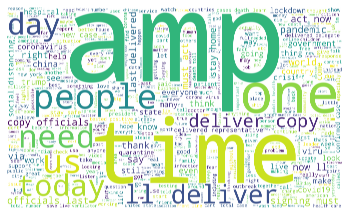

In [ ]:
wordcloud = WordCloud(height=6000, width=10000, stopwords=STOPWORDS, max_words = 500, background_color='white')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

In [ ]:
tweets_dt.text[0]

'people storing staying home freezing things talk dealers around state area freezers    said owner frank mertz'

In [ ]:
sid = SentimentIntensityAnalyzer()
sentiment_scores = texts.apply(lambda x: sid.polarity_scores(x))
sent_scores_df = pd.DataFrame(list(sentiment_scores))


In [ ]:
new_dataset['compound_sentiment'] = sent_scores_df['compound']
new_dataset.head()

,status_id,user_id,created_at,text,cleaned_text,compound_sentiment
0,1244051645975191557,80943559,2020-03-29T00:00:00Z,âPeople are just storing up. They are stayin...,people storing staying home freezing things ta...,-0.1280
1,1244051646935633921,27922157,2020-03-29T00:00:00Z,.@PatriceHarrisMD spoke with @YahooFinance abo...,spoke stimulus package making way congress hea...,0.0000
2,1244051645971025920,1115874631,2020-03-29T00:00:00Z,First medical team aiding #Wuhan in fight agai...,first medical team aiding fight epidemic compl...,-0.3818
3,1244051647149543426,108845320,2020-03-29T00:00:00Z,.@KathyGriffin: @realDonaldTrump Is 'Lying' Ab...,lying testing,-0.5267
4,1244051645102579712,17673635,2020-03-29T00:00:00Z,#CoronaUpdate | Johns Hopkins University has s...,johns hopkins university said authorize use lo...,0.0000


In [ ]:
# Forming condition for labeling the dataset with sentiment po;arity
def condition(data):
    if (data['compound_sentiment'] > 0):
      return 'Positive'
    elif (data['compound_sentiment'] == 0):
      return 'Neutral'
    elif (data['compound_sentiment'] < 0):
      return 'Negative'

In [ ]:
new_dataset['Polarity'] = new_dataset.apply(condition, axis=1)

In [ ]:
new_dataset.head(3)

,status_id,user_id,created_at,text,cleaned_text,compound_sentiment,Polarity
0,1244051645975191557,80943559,2020-03-29T00:00:00Z,âPeople are just storing up. They are stayin...,people storing staying home freezing things ta...,-0.1280,Negative
1,1244051646935633921,27922157,2020-03-29T00:00:00Z,.@PatriceHarrisMD spoke with @YahooFinance abo...,spoke stimulus package making way congress hea...,0.0000,Neutral
2,1244051645971025920,1115874631,2020-03-29T00:00:00Z,First medical team aiding #Wuhan in fight agai...,first medical team aiding fight epidemic compl...,-0.3818,Negative
